# **크루즈선의 승무원 수 예측** 

---
## **문제 정의 및 데이터**

> **프로젝트 개요**

```
선박 제조회사는 안정적인 운항을 위해 적절한 승무원이 필수적입니다. 그런데 출항 전에는 승무원 수를 예측 할 수 없기 때문에 인력 운영을 효율적으로 하기 힘든 상황입니다. 
선박회사는 수집된 데이터를 바탕으로 크루즈선에 필요한 승무원 수를 예측하여 인력운영을 효율화하고자 합니다
```

> **데이터**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/cruise_info.csv")
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


* 데이터 Description
-Age 
-Tonnage (1000s of Tons) 배의 부피
-Passengers (100s)
-Length (100s of feet)
-Cabins (100s)
-Passenger Density (Passengers/Space)

## **프로젝트 목표 정의**
> **문제정의**

``` 
🤘 승무원 인력 비효율로 인해 운영 비용 상승
```  
 
> **가설검정**

```
🤘 승객수, 선실 정보 등으로 적절한 승무원 수가 예측 가능할까 -> 운영 비용 절감
```

> **해결방안**

```
🤘 승무원 수 예측을 통해 인력 운영 조정
- 1. 데이터 전처리 및 탐색적 데이터 분석
- 2. lineplot, heatmap을 이용한 승무원수 상관관계 분석
- 3. 머신러닝 알고리즘을 활용하여 승무원수 예측 모델 구축
```

> **효과검증**

```
🤘 승무원 수 예측량에 따른 운영 조정 후 운영 비용 모니터링 
```

## Step1. 탐색적 데이터 분석(EDA)

### ·  기본정보 파악
- Data shape, type 확인
- 결측치 확인
- 이상치 확인

### · 목표변수 분포

- target변수인 'crew'의 데이터 분포 파악

In [ ]:
df.shape

(158, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               158 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


<Axes: xlabel='crew', ylabel='Count'>

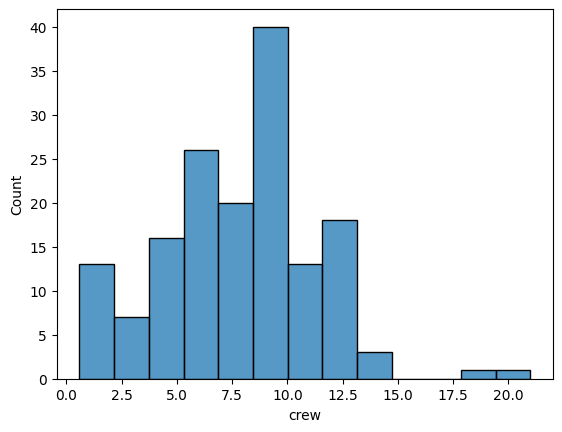

In [ ]:
sns.histplot(df['crew'])

In [ ]:
df['crew'].skew()

0.19478713071101847

### · 기술통계량 확인

In [ ]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [ ]:
# transpose()함수를 이용해 기술통계량 데이터프레임 전치시키기
df_stat = sdf.describe().transpose()
df_stat

### . 결측치 처리

In [ ]:
df.isnull().sum()

Ship_name            0
Cruise_line          0
Age                  0
Tonnage              0
passengers           0
length               0
cabins               0
passenger_density    0
crew                 0
dtype: int64

### . 이상치 분석 및 처리

Age                     Axes(0.125,0.11;0.0945122x0.77)
Tonnage              Axes(0.238415,0.11;0.0945122x0.77)
passengers           Axes(0.351829,0.11;0.0945122x0.77)
length               Axes(0.465244,0.11;0.0945122x0.77)
cabins               Axes(0.578659,0.11;0.0945122x0.77)
passenger_density    Axes(0.692073,0.11;0.0945122x0.77)
crew                 Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

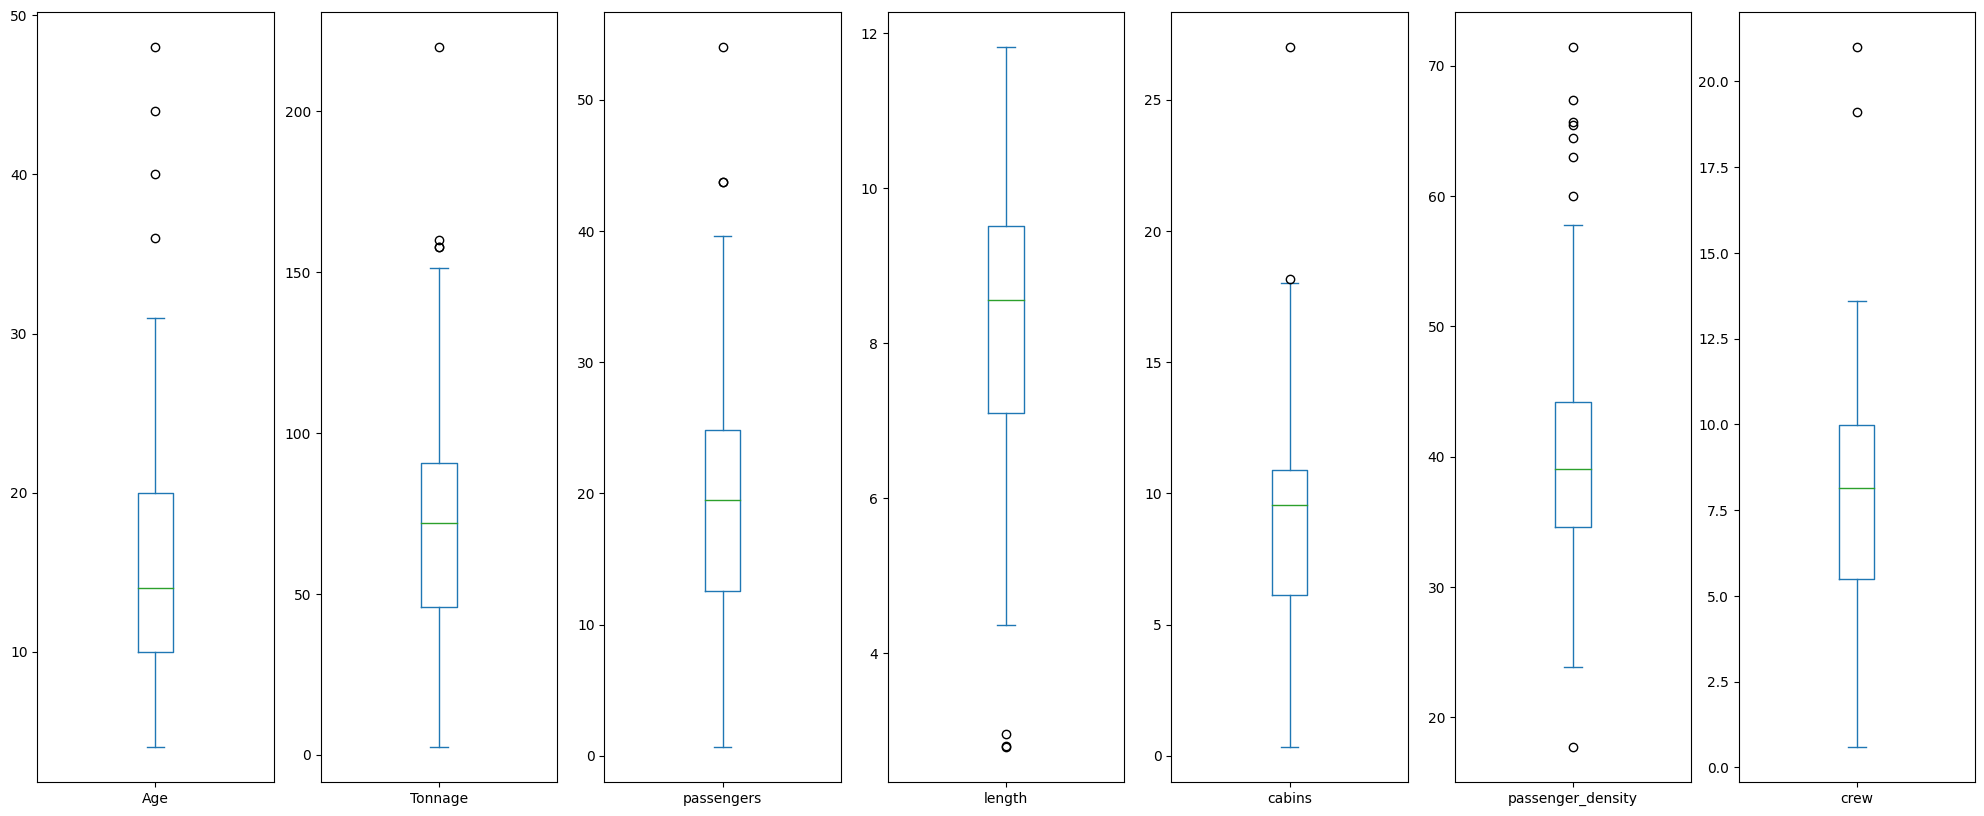

In [ ]:
df.plot(kind='box', subplots=True, figsize=(25,10))

### . 피쳐 분포 파악하기

<Axes: xlabel='Age', ylabel='Count'>

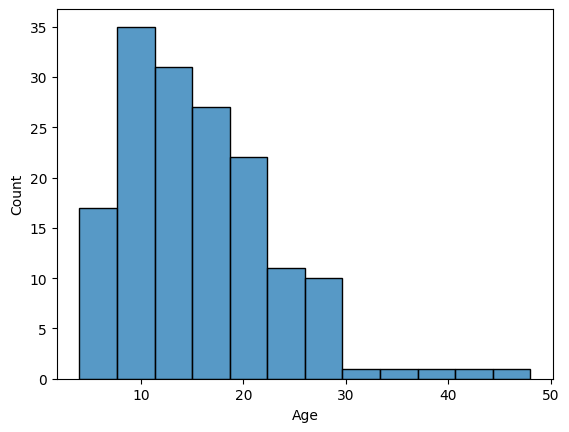

In [ ]:
# Age 분포
sns.histplot(df['Age'])

<Axes: xlabel='cabins', ylabel='Count'>

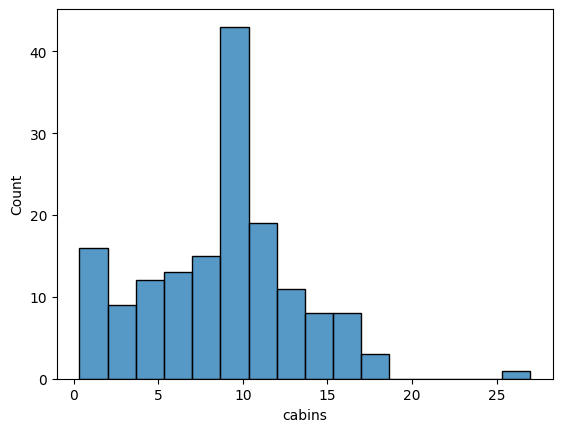

In [ ]:
sns.histplot(df['cabins'])

<Axes: xlabel='passengers', ylabel='Count'>

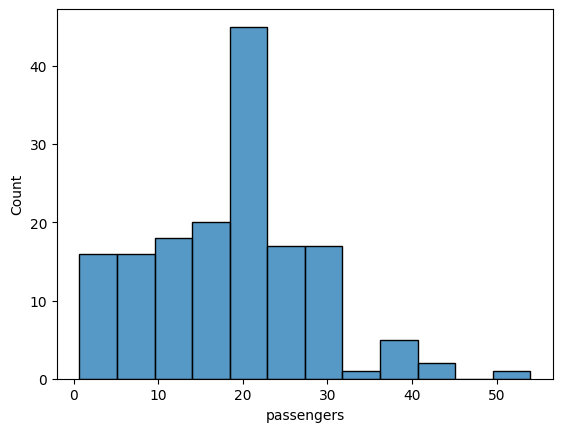

In [ ]:
sns.histplot(df['passengers'])

### . Cruise_line 과 승무원 수

In [ ]:
df['Ship_name'].value_counts()

Spirit          4
Legend          3
Star            3
Rhapsody        2
Mariner         2
               ..
Serena          1
Romantica       1
Mediterranea    1
Marina          1
Surf            1
Name: Ship_name, Length: 138, dtype: int64

In [ ]:
len(df['Cruise_line'].value_counts())

20

In [ ]:
df['Cruise_line'].value_counts()

Royal_Caribbean      23
Carnival             22
Princess             17
Holland_American     14
Norwegian            13
Costa                11
Celebrity            10
MSC                   8
Star                  6
P&O                   6
Regent_Seven_Seas     5
Silversea             4
Oceania               3
Seabourn              3
Windstar              3
Cunard                3
Disney                2
Crystal               2
Azamara               2
Orient                1
Name: Cruise_line, dtype: int64

In [ ]:
df.groupby(['Cruise_line']).mean()

<ipython-input-22-570d1be76bb2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Cruise_line']).mean()


,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Cruise_line,,,,,,,
Azamara,6.000000,30.277000,6.940000,5.940000,3.550000,42.640000,3.550000
Carnival,15.227273,84.652727,23.458182,8.898636,11.559091,36.045909,10.135909
Celebrity,13.700000,76.158600,17.980000,8.418000,8.064000,39.534000,8.072000
Costa,16.181818,71.096545,19.200000,8.138182,9.257273,37.311818,7.700000
Crystal,14.000000,59.502000,10.100000,7.855000,5.150000,58.610000,5.905000
Cunard,20.000000,103.909000,21.370000,10.196667,10.376667,47.353333,10.246667
Disney,14.500000,83.169000,17.500000,9.640000,8.750000,47.525000,9.450000
Holland_American,17.071429,60.501214,14.213571,7.863571,7.099286,42.715000,6.215000
MSC,15.125000,63.772250,18.878750,8.121250,8.760000,32.745000,7.540000


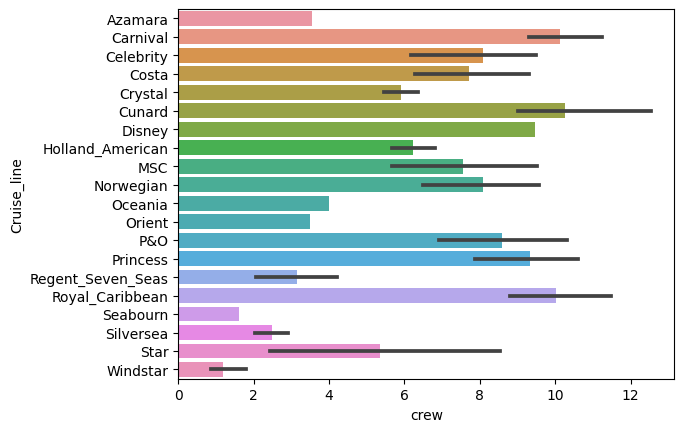

In [ ]:
sns.barplot(y=df['Cruise_line'], x=df['crew'])
#plt.xticks(rotation=90)
plt.show()

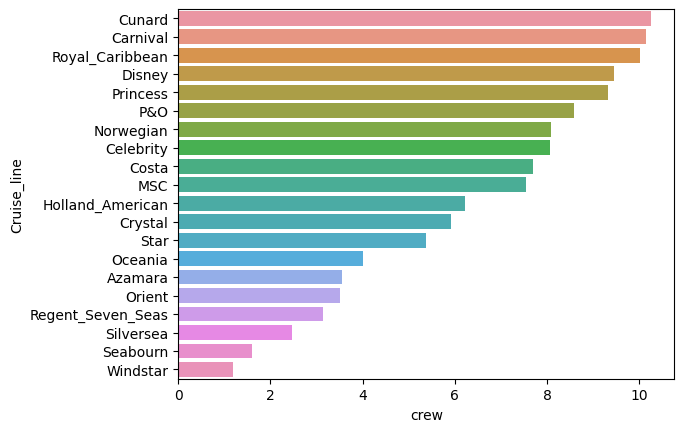

In [ ]:
cdf = df.groupby('Cruise_line')['crew'].mean().sort_values(ascending=False).reset_index()
sns.barplot(y=cdf['Cruise_line'], x=cdf['crew'])
#plt.xticks(rotation=90)
plt.show()

## Step2. 상관관계분석

### · 상관분석1
- lineplot으로 상관분석

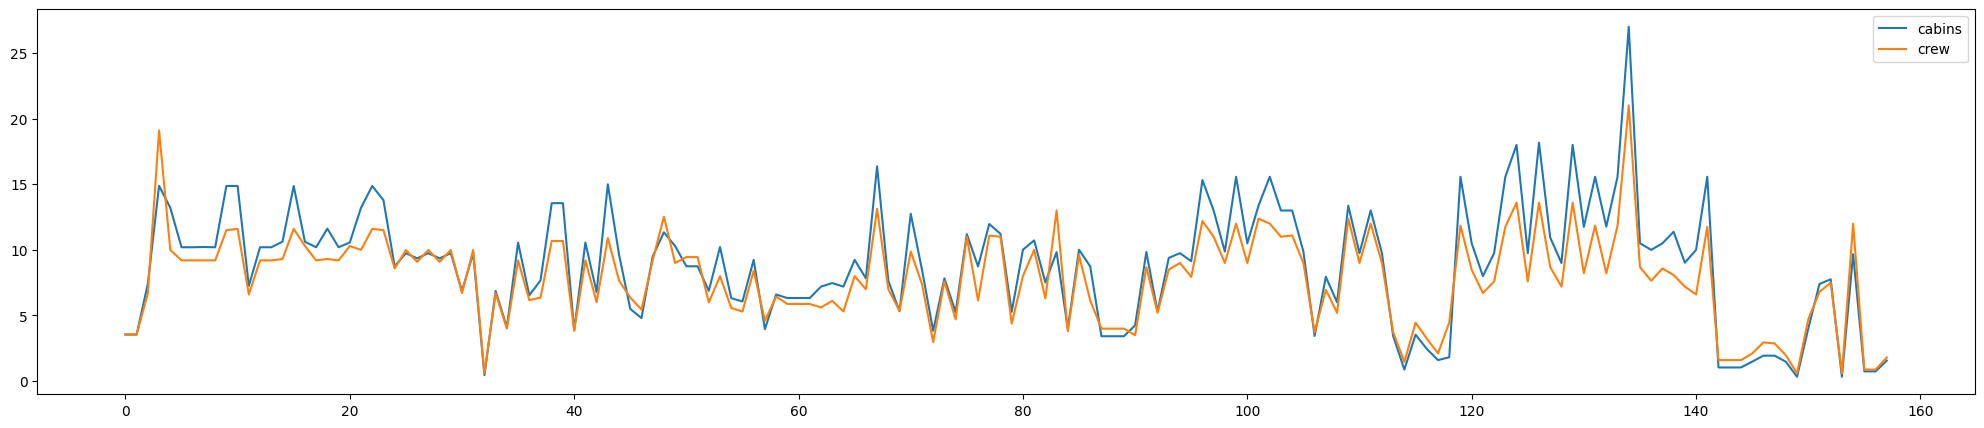

In [ ]:
# cabins 와 crew 의 관계
plt.figure(figsize=(25,5))
plt.plot(df['cabins'], label='cabins')
plt.plot(df['crew'], label='crew')
plt.legend()

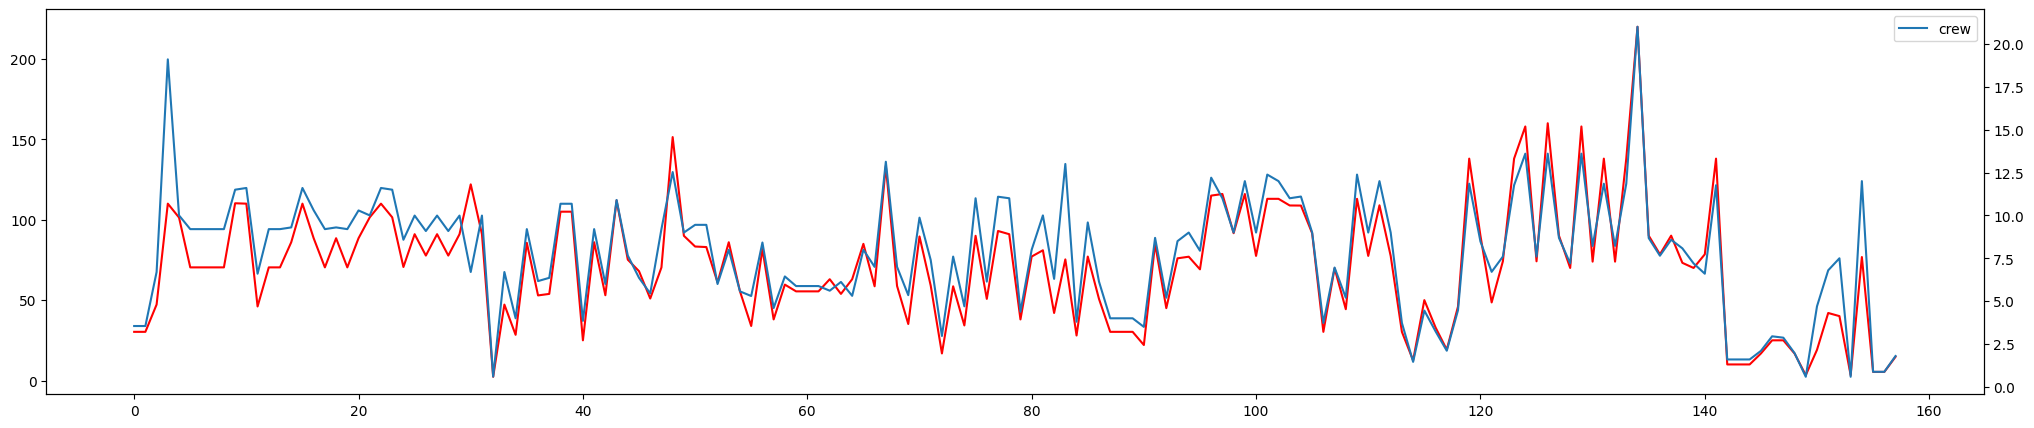

In [ ]:
#  passengers 와 crew 의 관계
plt.figure(figsize=(25,5))
plt.plot(df['Tonnage'], label='Tonnage', color='red')
plt.twinx()
plt.plot(df['crew'], label='crew')
plt.legend()

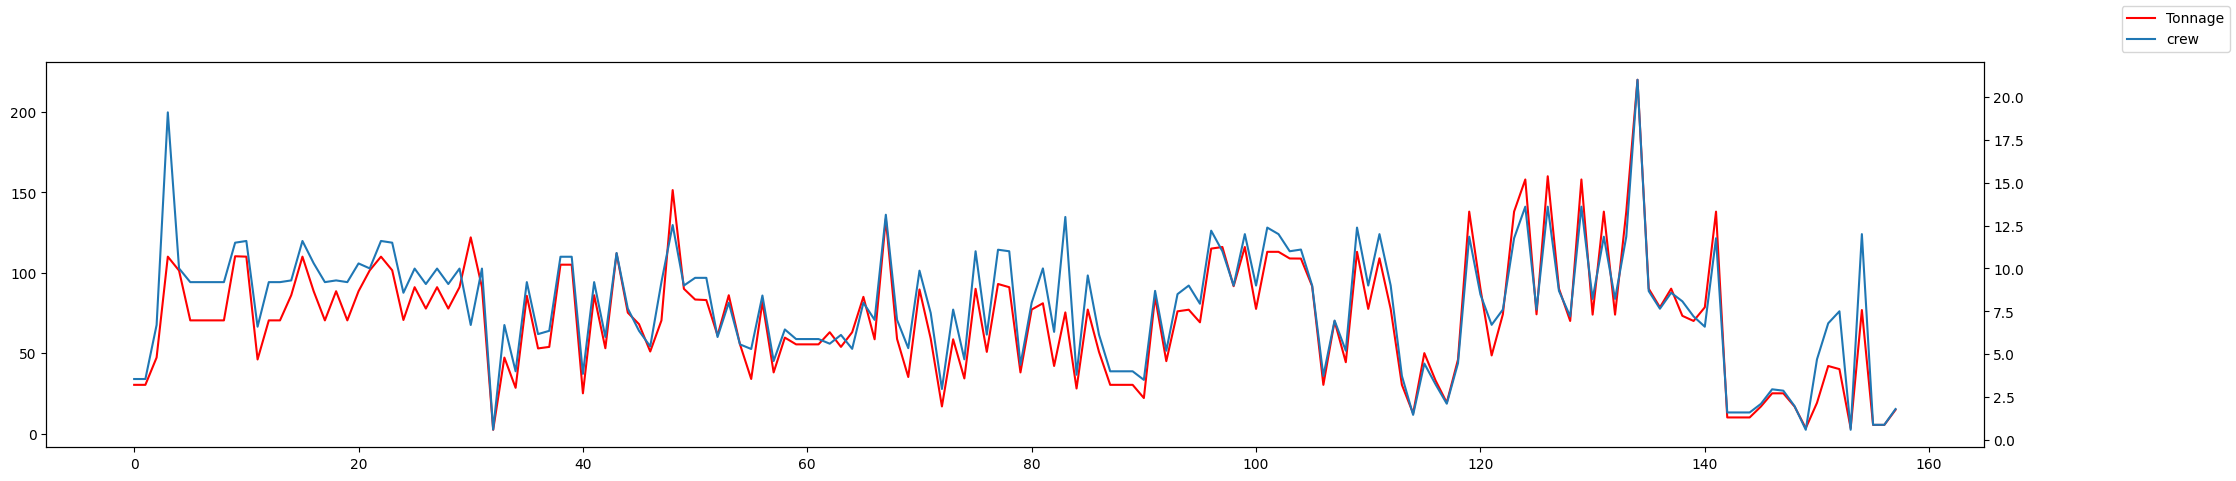

In [ ]:
fig, ax1 = plt.subplots()
ax1.plot(df['Tonnage'], label='Tonnage', color='red')
ax2 = ax1.twinx()
ax2.plot(df['crew'], label='crew')
plt.gcf().set_size_inches(25,5)
fig.legend()
plt.show()

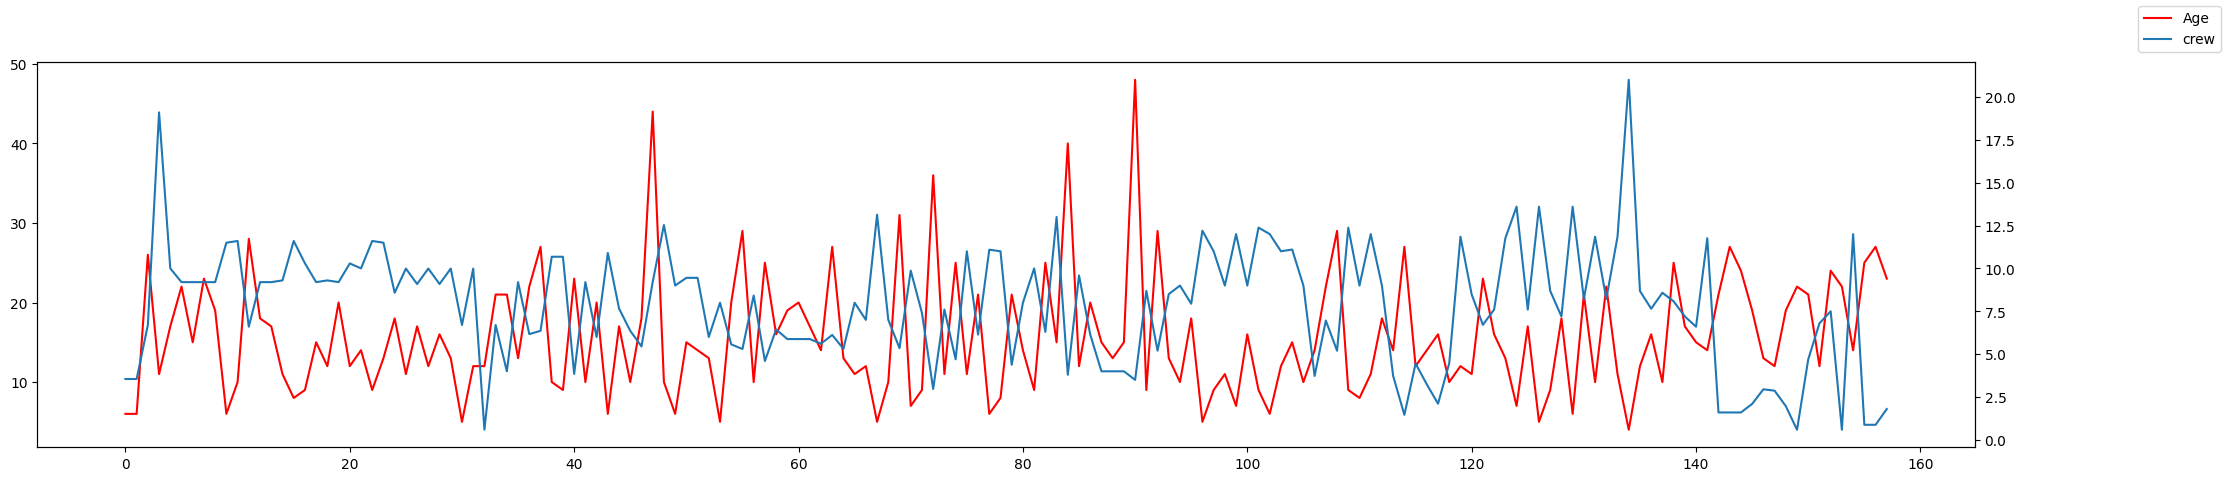

In [ ]:
# Age와 crew 관계
fig, ax1 = plt.subplots()
ax1.plot(df['Age'], label='Age', color='red')
ax2 = ax1.twinx()
ax2.plot(df['crew'], label='crew')
plt.gcf().set_size_inches(25,5)
fig.legend()
plt.show()

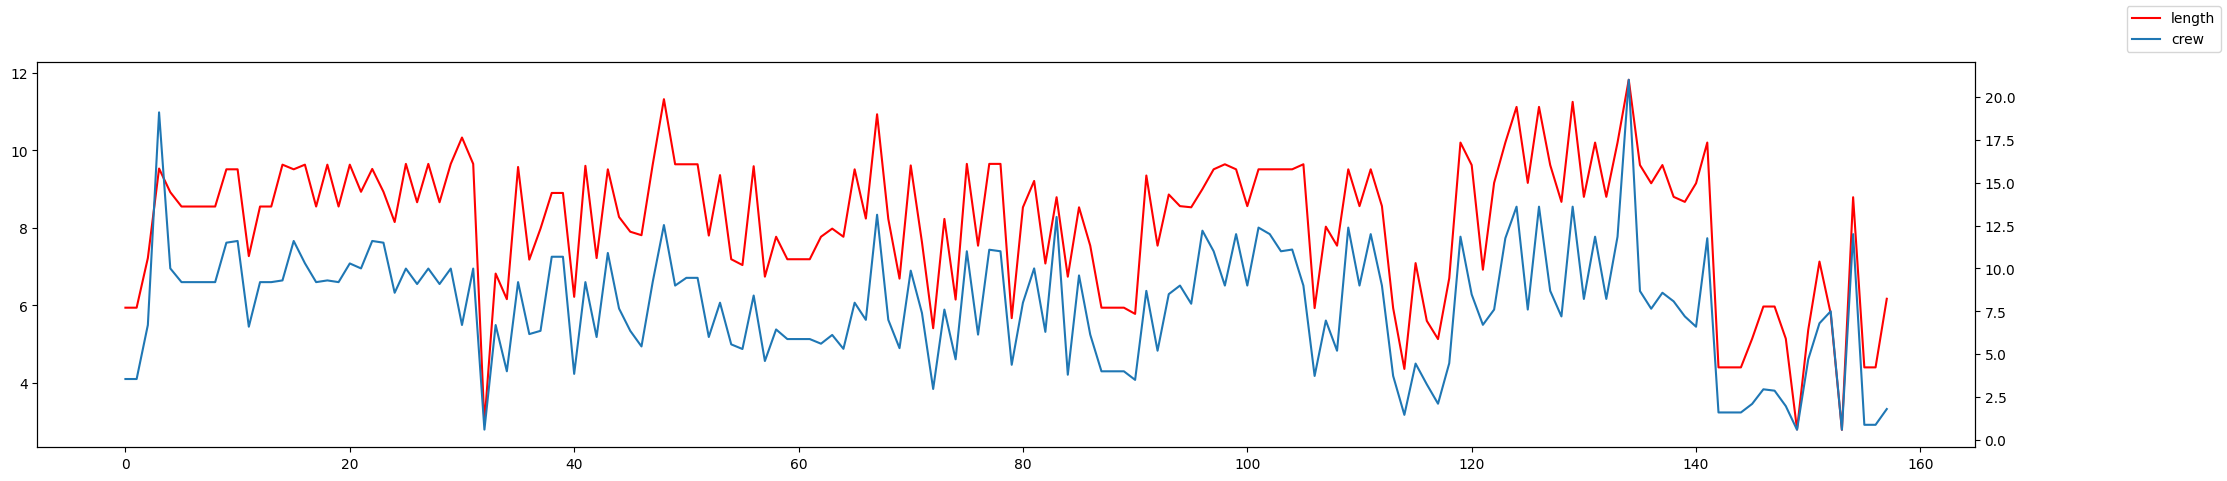

In [ ]:
# length와 crew 관계
fig, ax1 = plt.subplots()
ax1.plot(df['length'], label='length', color='red')
ax2 = ax1.twinx()
ax2.plot(df['crew'], label='crew')
plt.gcf().set_size_inches(25,5)
fig.legend()
plt.show()

In [ ]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


### · 상관분석2
- heatmap으로 상관분석

<ipython-input-57-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

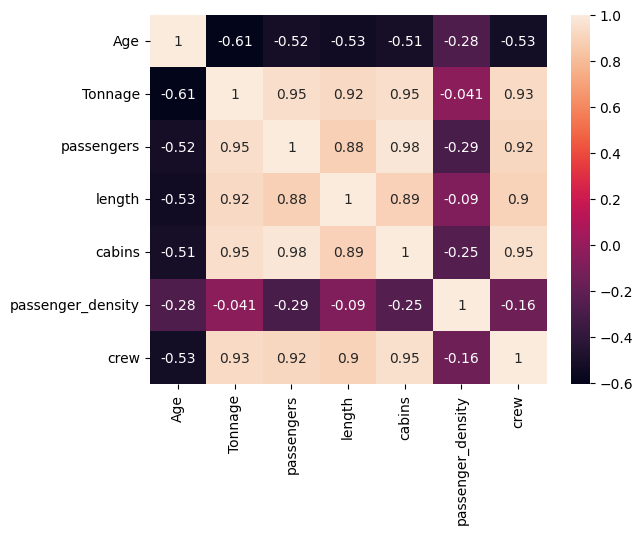

In [ ]:
sns.heatmap(df.corr(), annot=True)

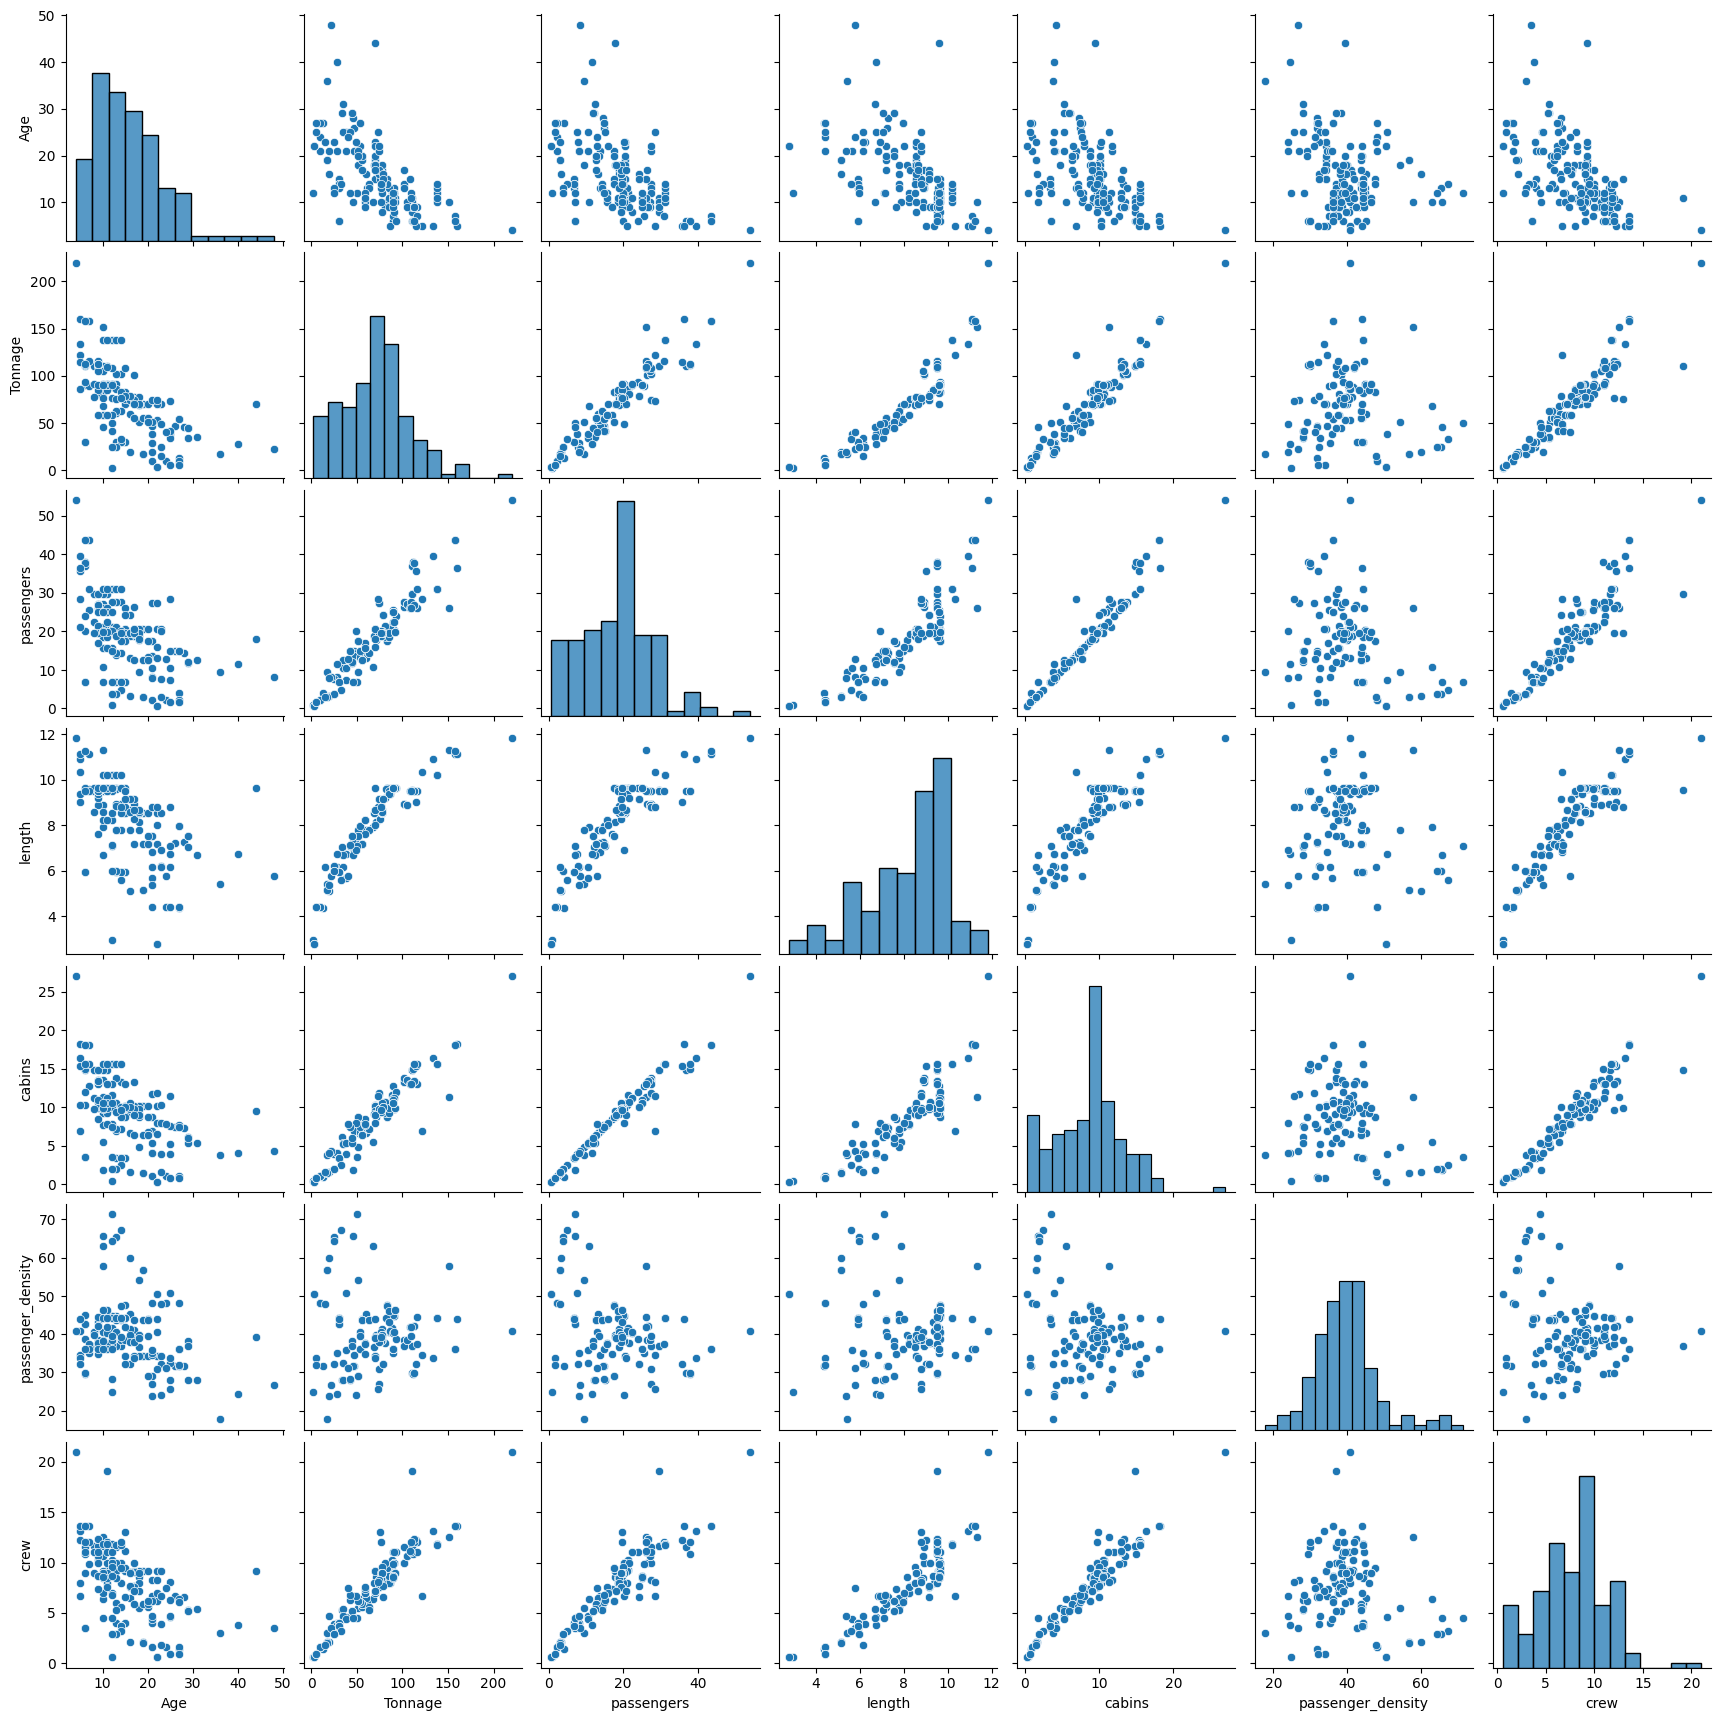

In [ ]:
sns.pairplot(df)

## Step3. 머신러닝 활용한 승무원 예측

1. **데이터 읽기:** <br>


2. **데이터 정제:** <br>


3. **데이터 시각화:** EDA<br>


4. **데이터 전처리:** <br>
    1) feature 추출 <br>
    2) x와 y로 분리<br>

5. **머신러닝 모델 학습:** 분류 모델<br>
    1) 베이스라인 모델 - 선형회귀<br>
    2) 성능 개선 I  - 독립변수 추가 <br>
    3) 성능 개선 II  - 표준화 <br>
    4) 성능 개선 III - RandomForestRegressor <br>

6. **평가 및 예측:** <br>
    1) MAE, R2 <br>
    2) 그래프 <br>


### . 베이스라인 모델 (linear regression)
- 범주형 독립변수 (Cruise_line) 을 제외한 모든 독립변수 사용
- linear regression

In [ ]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [ ]:
# 참고. vif 지수
from statsmodels.stats.outliers_influence import variance_inflation_factor

df1 = df.drop(['Ship_name','Cruise_line','crew','Tonnage','passengers','length'], axis=1)
corr_df = df1.corr()
vif_data = pd.DataFrame()
vif_data['Feature'] = corr_df.columns

vif_data['VIF'] = [variance_inflation_factor(corr_df.values, i) for i in range(len(corr_df.columns))]
print(vif_data)

             Feature       VIF
0                Age  6.669691
1             cabins  6.431997
2  passenger_density  3.590931


In [ ]:
corr_df

,Age,Tonnage,passengers,length,cabins,passenger_density
Age,1.000000,-0.606646,-0.515542,-0.532286,-0.510019,-0.278830
Tonnage,-0.606646,1.000000,0.945061,0.922368,0.948764,-0.040846
passengers,-0.515542,0.945061,1.000000,0.883535,0.976341,-0.294867
length,-0.532286,0.922368,0.883535,1.000000,0.889798,-0.090488
cabins,-0.510019,0.948764,0.976341,0.889798,1.000000,-0.253181
passenger_density,-0.278830,-0.040846,-0.294867,-0.090488,-0.253181,1.000000


> **1. 데이터셋 분할**


In [ ]:
from sklearn.model_selection import train_test_split

# x = df.drop(['Ship_name','Cruise_line' ], axis=1)
x = df.drop(['Ship_name','Cruise_line','crew' ], axis=1)
y = df['crew']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=11)

> **2. 모델 정의 및 학습**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

> **3. 예측 및 평가**

In [ ]:
# r2, mae, mse 
# coef 확인 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def eval_regression(y, pred) :
  mse_val =  mean_squared_error(y,pred)
  mae_val = mean_absolute_error(y, pred)
  r2_val= r2_score(y,pred)
  print(f'MSE:: {mse_val:.4f}, MAE::{mae_val:.4f}, R2::{r2_val:.4f}')

pred = lr.predict(x_test)
eval_regression(y_test, pred)

MSE:: 0.8555, MAE::0.6789, R2::0.9241


In [ ]:
lr.coef_

array([-0.01404896,  0.0131999 , -0.1759046 ,  0.4521992 ,  0.84443821,
       -0.00414919])

In [ ]:
coef = pd.Series (lr.coef_, index=x.columns).sort_values(ascending=False)
sns.barplot(x=coef.values, y=coef.index)

In [ ]:
##### statsmodel

import statsmodels.api as sm

# sm.add_constant, sm.OLS
X_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   crew   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     208.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.77e-55
Time:                        05:04:54   Log-Likelihood:                -153.63
No. Observations:                 110   AIC:                             321.3
Df Residuals:                     103   BIC:                             340.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6505      1.22

In [ ]:
from sklearn.model_selection import train_test_split

# x = df.drop(['Ship_name','Cruise_line' ], axis=1)
x = df[['passengers', 'length', 'cabins' ]]
#x = df[[ 'passengers','length' ]]
y = df['crew']

# cabins, tonnage, pass 0.9 이상 상관관계 - 다중공선성
# 하나만 써야만 .. 회귀계수를 해석할 수 있다 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=11)
X_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   crew   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     417.6
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.54e-58
Time:                        03:34:57   Log-Likelihood:                -155.07
No. Observations:                 110   AIC:                             318.1
Df Residuals:                     106   BIC:                             328.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5752      0.666     -2.366      0.0

In [ ]:
passengers length length                                         

In [ ]:
# crew , crew의 총임금
# 티켓의 판매건수  
# 공연.... , 판매건수, 회원권판매건수, 비원판매건수 

### . 성능 개선 I (Feature추가)

> **1. 데이터셋 분할**

- Cruise_line 을 원핫인코딩

In [ ]:
df1 = df[['passengers', 'length', 'cabins', 'Cruise_line' ]] 
x_oh = pd.get_dummies(df1, columns=['Cruise_line'])
x_oh.head()

,passengers,length,cabins,Cruise_line_Azamara,Cruise_line_Carnival,Cruise_line_Celebrity,Cruise_line_Costa,Cruise_line_Crystal,Cruise_line_Cunard,Cruise_line_Disney,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6.94,5.94,3.55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.94,5.94,3.55,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14.86,7.22,7.43,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29.74,9.53,14.88,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.42,8.92,13.21,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> **2. 모델 정의 및 학습**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_oh,y, test_size = 0.3, random_state=11)
X_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   crew   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     73.65
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           7.53e-47
Time:                        03:44:49   Log-Likelihood:                -131.64
No. Observations:                 110   AIC:                             309.3
Df Residuals:                      87   BIC:                             371.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

> **3. 예측 및 평가**

In [ ]:
# r2, mae, mse 
# coef 확인 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def eval_regression(y, pred) :
  mse_val =  mean_squared_error(y,pred)
  mae_val = mean_absolute_error(y, pred)
  r2_val= r2_score(y,pred)
  print(f'MSE:: {mse_val:.4f}, MAE::{mae_val:.4f}, R2::{r2_val:.4f}')

pred = lr.predict(x_test)
eval_regression(y_test, pred)

MSE:: 0.7799, MAE::0.5536, R2::0.9309


> **3. 예측 및 평가**

### . 성능 개선 II (표준화)

In [ ]:
from sklearn.preprocessing import StandardScaler

df1 = df[['passengers', 'length', 'cabins', 'Cruise_line' ]] 
x_oh = pd.get_dummies(df1, columns=['Cruise_line'])

scaler = StandardScaler( )
x_scaled = scaler.fit_transform(x_oh)

x_train, x_test, y_train, y_test = train_test_split(x_scaled ,y, test_size = 0.3, random_state=11)

lr = LinearRegression()
lr.fit(x_train, y_train)

pred = lr.predict(x_test)
eval_regression(y_test, pred)

MSE:: 0.7799, MAE::0.5536, R2::0.9309


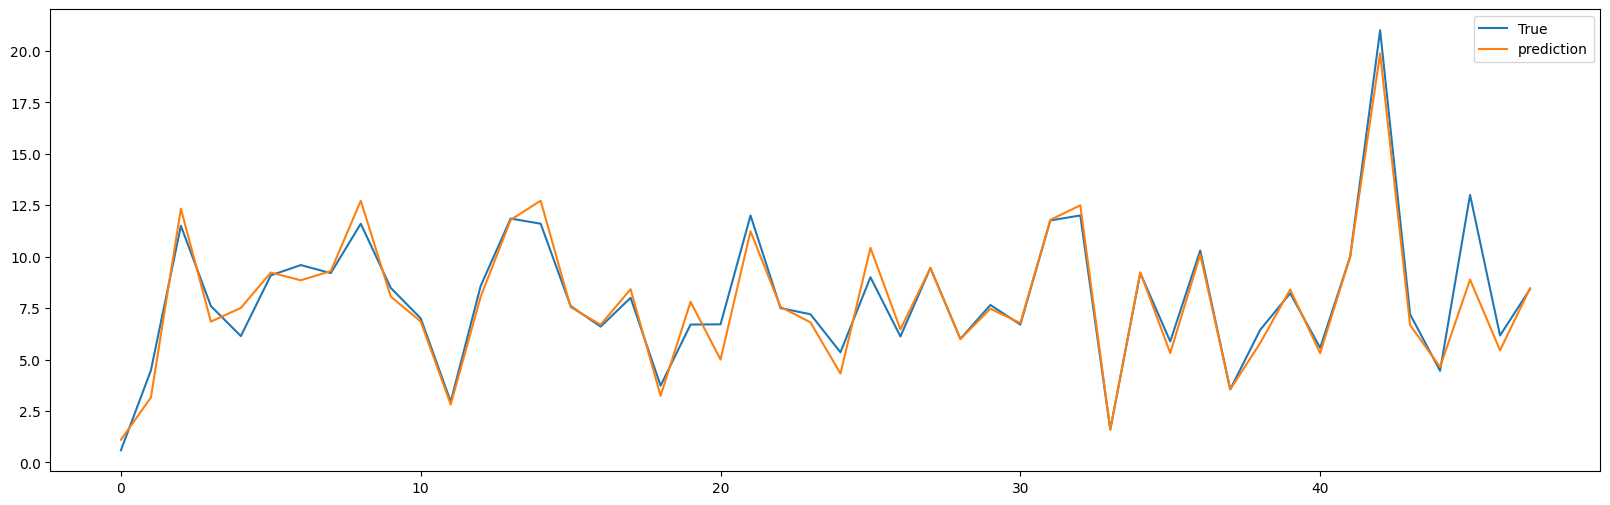

In [ ]:
# pred , y_test 
plt.figure(figsize=(20,6))
plt.plot(y_test.values, label='True')
plt.plot(pred, label='prediction')
plt.legend()

In [ ]:
len(y_test.values)

48

### . 성능 개선 III (RandomForestRegressor)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# x = df.drop(['Ship_name','Cruise_line' ], axis=1)
x = df.drop(['Ship_name','Cruise_line','crew' ], axis=1)
y = df['crew']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=11)

rfr = RandomForestRegressor(random_state=11)
rfr.fit(x_train, y_train)

pred = rfr.predict(x_test)
eval_regression(y_test, pred)

MSE:: 2.5027, MAE::0.8263, R2::0.7781


> **피쳐 중요도**

<Axes: >

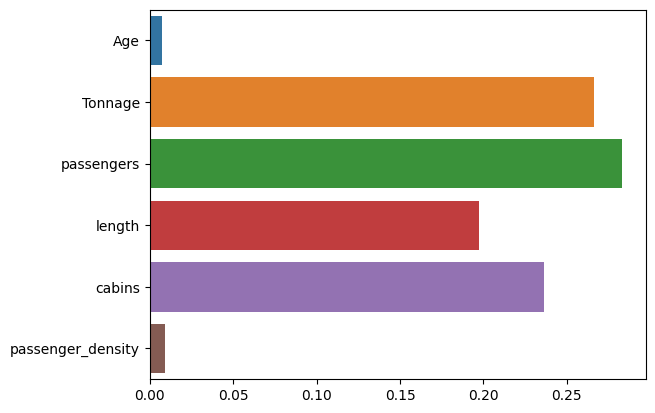

In [ ]:
sns.barplot(x=rfr.feature_importances_, y=x.columns)

### · 모델 Save
- 최종 모델을 저장 및 다시 불러오기